In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Audio
sound_file = 'glass_ping-Go445-1207030150.mp3'

play_sound = Audio(sound_file, autoplay=True)

In [3]:
X_resampledsklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, roc_auc_score

def scores(model, X_train, X_test, y_train, y_test, *args):
    '''
    input: the model you would like to test, while having train/test split
           initialized, normal nomenclature from sklearn train_test_split
    
    output: dictionary of scores for your model
    '''
    model_dic = {}
    
    # make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # scores for train
    model_dic['train_score'] = model.score(X_train, y_train)
    model_dic['train_precision'] = precision_score(y_train, train_pred)
    model_dic['train_recall'] = recall_score(y_train, train_pred)
    model_dic['train_f1'] = f1_score(y_train, train_pred)
    model_dic['train_confusion'] = confusion_matrix(y_train, train_pred, labels=[0, 1])
    model_dic['train_aoc'] = roc_auc_score(y_train, train_pred)
    
    # scores for test
    model_dic['test_score'] = model.score(X_test, y_test)
    model_dic['test_precision'] = precision_score(y_test, test_pred)
    model_dic['test_recall'] = recall_score(y_test, test_pred)
    model_dic['test_f1'] = f1_score(y_test, test_pred)
    model_dic['test_confusion'] = confusion_matrix(y_test, test_pred, labels=[0, 1])
    model_dic['test_aoc'] = roc_auc_score(y_test, test_pred)
    
    return model_dic

In [4]:
def percent_confusion(confusion_matrix, title='Confusion Matrix'):
    '''
    A fuction to create % of total actual predictions
    
    input: confusion matrix values
    output: seaborn chart of percent of original 
    '''
    
    pred_true = confusion_matrix[1][1]
    pred_false_neg = confusion_matrix[1][0]
    pred_false = confusion_matrix[0][0]
    pred_false_pos = confusion_matrix[0][1]

    true_actual = confusion_matrix[1].sum()
    false_actual = confusion_matrix[0].sum()
    
    # creating a confusion matrix
    confusion = [[pred_false/false_actual, pred_false_pos/false_actual],
                 [pred_false_neg/true_actual, pred_true/true_actual]]
    
    plt.figure(figsize=(8,6))
    matrix = sns.heatmap(confusion, vmin=0, vmax=1, annot=True, fmt='.2%')
    plt.xlabel('Predicted Values', labelpad=10, fontsize=12)
    plt.ylabel('Actual Values', labelpad=10, fontsize=12)
    plt.title(title, pad=10, fontsize=15)
    
    return plt.show()

In [115]:
X = pd.read_pickle('X_train.pickle')
y = pd.read_pickle('y_train.pickle')

In [105]:
from sklearn.model_selection import train_test_split

In [6]:
X_ada_train = pd.read_pickle('X_ada_train')

X_test = pd.read_pickle('x_test')
y_ada_train = pd.read_pickle('y_ada_train')
y_test = pd.read_pickle('y_test')

In [35]:
train_df = pd.read_csv('Fraud/train_transaction.csv')

In [57]:
train_df.iloc[:,:20]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,87.0,3.0,NaN,aol.com,NaN,1.0,1.0,0.0


## Naive Bayes

In [7]:
nb = BernoulliNB()

nb.fit(X=X_train, y=y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [8]:
nb_scores = scores(nb, X_train, X_test, y_train, y_test)

nb_scores

{'train_score': 0.8060682689666332,
 'train_precision': 0.09406835044016454,
 'train_recall': 0.5263497526349753,
 'train_f1': 0.15961124518948536,
 'train_confusion': array([[418626,  94264],
        [  8808,   9788]]),
 'train_aoc': 0.6712799280829735,
 'test_score': 0.8159142479764283,
 'test_precision': 0.10541412692721405,
 'test_recall': 0.5689404934687954,
 'test_f1': 0.17787188988883007,
 'test_confusion': array([[47007,  9980],
        [  891,  1176]]),
 'test_aoc': 0.6969064163871255}

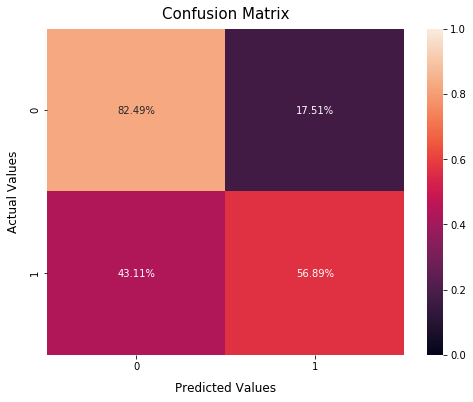

In [9]:
percent_confusion(nb_scores['test_confusion'])

## KNN

In [59]:
knn = KNeighborsClassifier()

In [60]:
%%time
knn.fit(X_ada_train, y_ada_train)

knn_scores = scores(knn, X_train, X_test, y_train, y_test)
play_sound

CPU times: user 1min 28s, sys: 1 s, total: 1min 29s
Wall time: 1min 23s


In [61]:
knn_scores

{'train_score': 0.8217921074120484,
 'train_precision': 0.15057060751567677,
 'train_recall': 0.8819100881910088,
 'train_f1': 0.2572246402384033,
 'train_confusion': array([[420371,  92519],
        [  2196,  16400]]),
 'train_aoc': 0.850761240355911,
 'test_score': 0.8209943441595827,
 'test_precision': 0.1506736772921459,
 'test_recall': 0.8872762457668119,
 'test_f1': 0.2576023597162722,
 'test_confusion': array([[46649, 10338],
        [  233,  1834]]),
 'test_aoc': 0.8529332252751796}

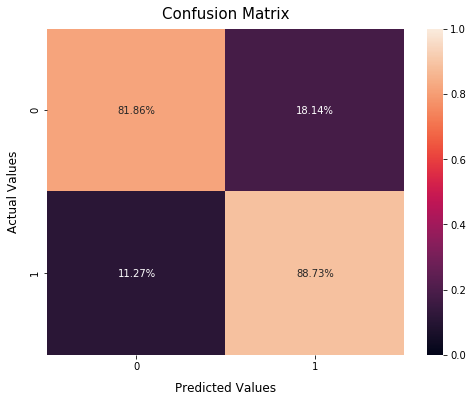

CPU times: user 212 ms, sys: 10.6 ms, total: 223 ms
Wall time: 227 ms


In [62]:
%%time
percent_confusion(knn_scores['test_confusion'])

## Binary

In [10]:
binary_columns = X_train.drop(columns=(['TransactionID','TransactionDT'])).columns
binary_columns = [col for col in binary_columns if len(X_train[col].value_counts().index) == 2]

binary_columns = [X_train.columns.get_loc(col) for col in binary_columns]

## Imbalanced Data

In [119]:
train_df = pd.read_csv('Fraud/train_transaction.csv')

In [120]:
X = train_df.drop(columns=['isFraud'])
y = train_df['isFraud']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [134]:
cat_cal = [x for x in train_df if train_df[x].dtype == 'O']

In [135]:
X_train = pd.get_dummies(X_train, columns=cat_cal, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cal, drop_first=True)

In [137]:
X_train.sample(2)

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,M1_T,M2_T,M3_T,M4_M1,M4_M2,M5_T,M6_T,M7_T,M8_T,M9_T
364783,3351783,9059324,50.00,6994,555.0,150.0,226.0,315.0,87.0,NaN,...,0,0,0,0,0,0,0,0,0,0
151680,3138680,3120291,31.95,9874,555.0,150.0,226.0,485.0,87.0,3.0,...,1,1,1,0,0,0,1,0,0,0


In [138]:
na_cols = X_train.columns[X_train.isna().sum()>0]

test_na_cols = X_test.columns[X_test.isna().sum()>0]

In [139]:
# fill NAs with median values
for column in X_train[na_cols]:
    median = X_train[column].median()
    X_train[column].fillna(median, inplace=True)
    

for column in X_train[test_na_cols]:
    median = X_test[column].median()
    X_test[column].fillna(median, inplace=True)

X_test.isna().sum().sum()

0

In [140]:
from imblearn.over_sampling import SMOTENC

In [141]:
smote_nc = SMOTENC(categorical_features=binary_columns,
                   random_state=0, sampling_strategy='minority')

In [142]:
%%time
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)
play_sound

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


CPU times: user 38min 4s, sys: 43.3 s, total: 38min 48s
Wall time: 37min 38s


In [143]:
X_smote_minority = pd.DataFrame(X_resampled, columns=X_train.columns)

y_smote_minority = pd.Series(y_resampled, name='isFraud')

In [158]:
del X_test

In [144]:
X_smote_minority.to_pickle('X_smote_minority.pickle')
y_smote_minority.to_pickle('y_smote_minority.pickle')

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
clf = RandomForestClassifier(criterion='entropy')

In [147]:
%%time
clf.fit(X_smote_minority, y_smote_minority)

RF_scores = scores(clf, X_smote_minority, X_test, y_smote_minority, y_test)
play_sound

CPU times: user 13min 10s, sys: 9.39 s, total: 13min 20s
Wall time: 9min 56s


In [148]:
feat_imp = pd.DataFrame(zip(clf.feature_importances_, X_ada_train.columns), columns=('importance','features'))

In [151]:
cum_imp = feat_imp.sort_values('importance', ascending=True)['importance'].cumsum()

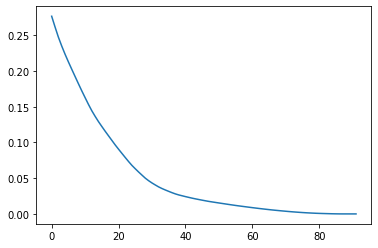

In [152]:
plt.plot(range(0, len(cum_imp))[::-1], cum_imp);

In [149]:
RF_scores

{'train_score': 0.9999906412608094,
 'train_precision': 1.0,
 'train_recall': 0.9999812825216187,
 'train_f1': 0.9999906411732226,
 'train_confusion': array([[427408,      0],
        [     8, 427400]]),
 'train_aoc': 0.9999906412608093,
 'test_score': 0.9788261591086125,
 'test_precision': 0.909967845659164,
 'test_recall': 0.43825009678668214,
 'test_f1': 0.591586098771884,
 'test_confusion': array([[142245,    224],
        [  2902,   2264]]),
 'test_aoc': 0.7183389124620156}

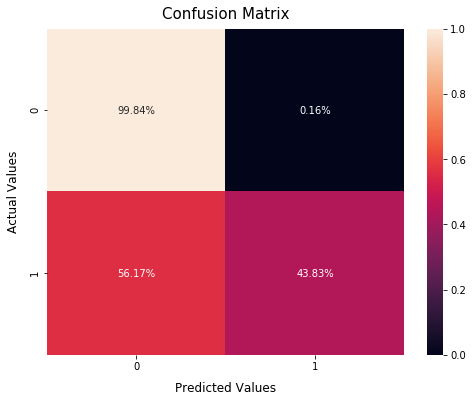

In [150]:
percent_confusion(RF_scores['test_confusion'])

## Scale Data

In [14]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [15]:
X_scale_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_smote.columns)
X_scale_test = pd.DataFrame(scaler.transform(X_test), columns=X_smote.columns)

In [19]:
X_scale_smote_train = pd.DataFrame(scaler.fit_transform(X_smote), columns=X_smote.columns)
X_scale_smote_test = pd.DataFrame(scaler.transform(X_test), columns=X_smote.columns)

## Naive Bayes Scaled

In [20]:
nb = BernoulliNB()
nb.fit(X_scale_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [22]:
nbs_scores = scores(nb, X_scale_smote_train, X_scale_smote_test, y_smote, y_test)
nbs_scores

{'train_score': 0.736626762073739,
 'train_precision': 0.8488970789049272,
 'train_recall': 0.5757335880988126,
 'train_f1': 0.6861266888104292,
 'train_confusion': array([[460329,  52561],
        [217602, 295288]]),
 'train_aoc': 0.736626762073739,
 'test_score': 0.8876452060825685,
 'test_precision': 0.15012254901960784,
 'test_recall': 0.4741170778906628,
 'test_f1': 0.22803955788248978,
 'test_confusion': array([[51439,  5548],
        [ 1087,   980]]),
 'test_aoc': 0.6883807703314371}

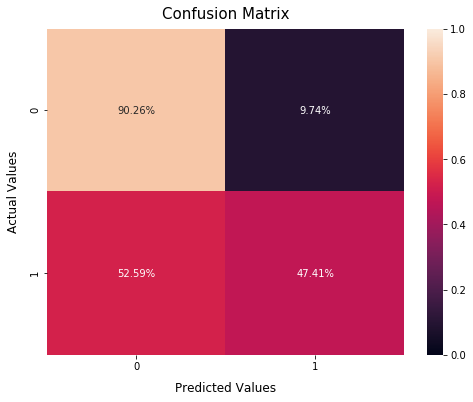

In [23]:
percent_confusion(nbs_scores['test_confusion'])

## Naive Bayes with SMOTE

In [24]:
nb = BernoulliNB()
nb.fit(X_smote, y_smote)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [25]:
nbs_scores = scores(nb, X_smote, X_test, y_smote, y_test)
nbs_scores

{'train_score': 0.7509748679053988,
 'train_precision': 0.7606884861446113,
 'train_recall': 0.732344167365322,
 'train_f1': 0.7462472769102855,
 'train_confusion': array([[394723, 118167],
        [137278, 375612]]),
 'train_aoc': 0.7509748679053989,
 'test_score': 0.7866867612693467,
 'test_precision': 0.09375,
 'test_recall': 0.5878084179970973,
 'test_f1': 0.16170892393691355,
 'test_confusion': array([[45242, 11745],
        [  852,  1215]]),
 'test_aoc': 0.6908543906189182}

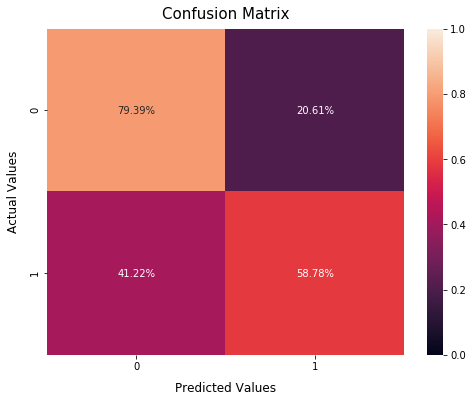

In [26]:
percent_confusion(nbs_scores['test_confusion'])

## KNN With SMOTE

In [27]:
knn = KNeighborsClassifier()

In [28]:
%%time
knn.fit(X_smote, y_smote)

knn_scale_scores = scores(knn, X_smote, X_test, y_smote, y_test)
play_sound

CPU times: user 2min 41s, sys: 1.79 s, total: 2min 42s
Wall time: 2min 37s


In [29]:
knn_scale_scores

{'train_score': 0.9097369806391234,
 'train_precision': 0.8674130901512661,
 'train_recall': 0.9673341262258964,
 'train_f1': 0.9146527392424106,
 'train_confusion': array([[437054,  75836],
        [ 16754, 496136]]),
 'train_aoc': 0.9097369806391233,
 'test_score': 0.03552680597419311,
 'test_precision': 0.03502024634464531,
 'test_recall': 1.0,
 'test_f1': 0.06767064986086102,
 'test_confusion': array([[   31, 56956],
        [    0,  2067]]),
 'test_aoc': 0.5002719918577921}

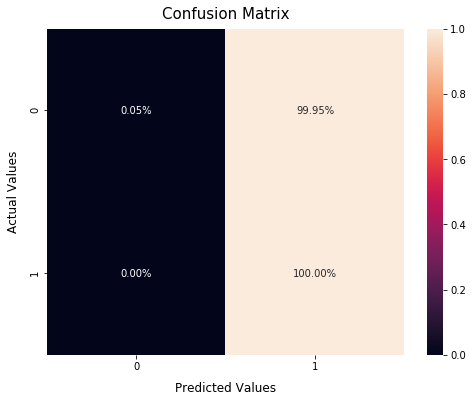

CPU times: user 175 ms, sys: 6.57 ms, total: 182 ms
Wall time: 182 ms


In [30]:
%%time
percent_confusion(knn_scale_scores['test_confusion'])

In [31]:
knn_scale_scores['test_confusion']

array([[   31, 56956],
       [    0,  2067]])